In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
print('Imported!')

Imported!


In [6]:
# Color Pallette

sbcolors = sb.color_palette()
sbcolors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [7]:
# reading pokemon dataset

pokemon = pd.read_csv('datasets/pokemon.csv')
pokemon.head(3)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100


Plotting the special-defense histogram with default 10 bins and variable bins... 

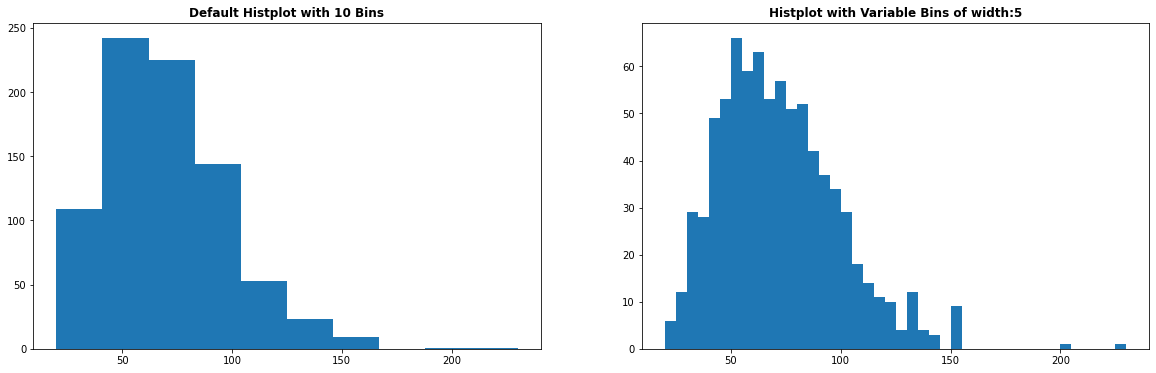

In [10]:
plt.figure(figsize=(20,6))
x = pokemon['special-defense']
width = 5
bins = np.arange(x.min(), x.max()+width, width)

# For default histplot with 10 bins
plt.subplot(1,2,1)
plt.hist(x)
plt.title('Default Histplot with 10 Bins', fontweight='bold')

# For Histplot with variable bins
plt.subplot(1,2,2)
plt.hist(x, bins=bins)
plt.title(f'Histplot with Variable Bins of width:{width}', fontweight='bold')

plt.show()

## Figures, Axes, and Subplots
At this point, you've seen and had some practice with some basic plotting functions using matplotlib and seaborn. The above cell introduced something a little bit new: creating two side-by-side plots through the use of matplotlib's `subplot()` function. 

The base of visualization in matplotlib is a `Figure` object. Contained within each Figure will be one or more `Axes` objects, each `Axes` object containing a number of other elements that represent each plot. In the earliest examples, these objects have been created implicitly. Let's say that the following expression is run inside a Jupyter notebook to create a histogram:
```
plt.hist(data=pokemon, x='speed');
```

Since we don't have a `Figure` area to plot inside, Python first creates a `Figure` object. And since the `Figure` doesn't start with any `Axes` to draw the histogram onto, an `Axes` object is created inside the `Figure`. Finally, the histogram is drawn within that `Axes`.

<img src='https://video.udacity-data.com/topher/2018/August/5b804b9b_l3-c09b-subplotsa/l3-c09b-subplotsa.png'>

This hierarchy of objects is useful to know about so that we can take more control over the layout and aesthetics of our plots. One alternative way we could have created the histogram is to explicitly set up the `Figure` and `Axes` like this:

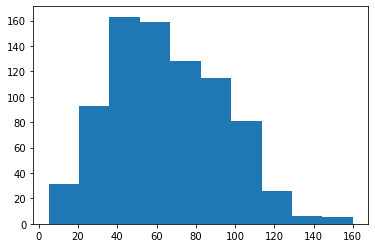

In [11]:
# Create a new figure object
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])

# Finally, plot a histogram within the Axes on the Figure object
ax.hist(data=pokemon, x='speed');

`figure()` creates a new `Figure` object, a reference to which has been stored in the variable fig. One of the Figure methods is `.add_axes()`, which creates a new `Axes` object in the Figure. The method requires one list as argument specifying the dimensions of the `Axes`: the first two elements of the list indicate the position of the _lower-left_ hand corner of the `Axes` (in this case one quarter of the way from the lower-left corner of the Figure) and the last two elements specifying the `Axes` _width_ and _height_, respectively. We refer to the `Axes` in the variable `ax`. Finally, we use the `Axes` method `.hist()` just like we did before with `plt.hist()`.

## Use axes with seaborn.countplot()

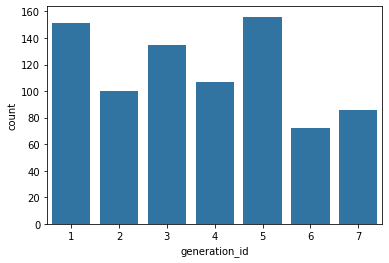

In [13]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sbcolors[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax)
plt.show()

In the above two cases, there was no purpose to explicitly go through the `Figure` and `Axes` creation steps. And indeed, in most cases, you can just use the basic matplotlib and seaborn functions as is. Each function targets a `Figure` or `Axes`, and they'll automatically target the most recent `Figure` or `Axes` worked with. As an example of this, let's review in detail how `subplot()` was used on the Histograms page:

## Subplots

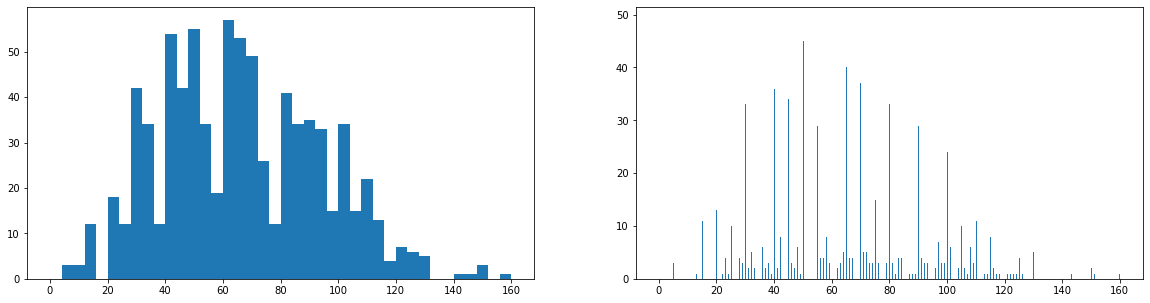

In [14]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

First of all, `plt.figure(figsize = [20, 5])`creates a new `Figure`, with the "figsize" argument setting the `width` and `height` of the overall figure to 20 inches by 5 inches, respectively. Even if we don't assign any variable to return the function's output, Python will still implicitly know that further plotting calls that need a `Figure` will refer to that Figure as the active one.


Then, `plt.subplot(1, 2, 1)` creates a new `Axes` in our `Figure`, its size determined by the `subplot()` function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new `Axes` in the first slot. Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1 (rather than the usual Python indexing starting from 0). (You'll see the indexing a little better in the example at the end of the page.) Again, Python will implicitly set that `Axes` as the current Axes, so when the `plt.hist()` call comes, the histogram is plotted in the left-side subplot.


Finally, `plt.subplot(1, 2, 2)` creates a new `Axes` in the second subplot slot, and sets that one as the current `Axes`. Thus, when the next `plt.hist()` call comes, the histogram gets drawn in the right-side subplot.

## Additional Techniques
To close, we'll quickly run through a few other ways of dealing with Axes and subplots. The techniques above should suffice for basic plot creation, but you might want to keep the following in the back of your mind as additional tools to break out as needed.

If you don't assign `Axes` objects as they're created, you can retrieve the current Axes using `ax = plt.gca()`, or you can get a list of all Axes in a Figure fig by using `axes = fig.get_axes()`. As for creating subplots, you can use `fig.add_subplot()` in the same way as `plt.subplot()` above. If you already know that you're going to be creating a bunch of subplots, you can use the `plt.subplots()` function:

### Demonstrate pyplot.sca() and pyplot.text() to generate a grid of subplots

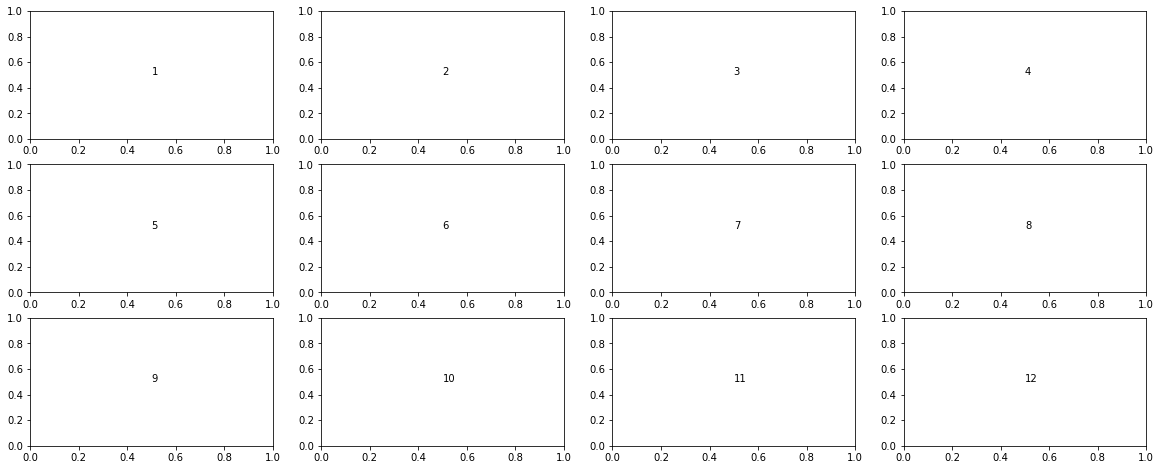

In [17]:
fig, axes = plt.subplots(3, 4, figsize=(20,8)) # grid of 3x4 subplots of width=20 and height=8
axes = axes.flatten() # reshape from 3x4 array into 12-element vector

for i in range(len(axes)):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes